In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from keras.datasets import imdb
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
from keras.applications import vgg16
import cv2 as cv
import xml.etree.ElementTree as ET
from os import listdir
import shutil, os
from os.path import isfile, join
import os
from PIL import Image

In [2]:
def get_video_frames(video_file, topN=50):
    # get the video data
    cap = cv2.VideoCapture(video_file)
    ret, frame = cap.read()
    video_data = []
    while (ret):
        video_data.append(frame)
        ret, frame = cap.read()
    print("original # frames: %d"%(len(video_data)))
    assert len(video_data) >= topN
    video_data = video_data[:topN]
    return video_data

In [2]:
image_size=(416, 416)
batch_size= 32
seed =123

In [3]:
#обучающий датасет и датасет валидации

train_ds = image_dataset_from_directory(directory='DataSet_cars_train', validation_split=0.2 ,subset="training", image_size=image_size, seed =seed ,batch_size= batch_size)
valid_ds = image_dataset_from_directory(directory='DataSet_cars_train', validation_split=0.2 ,subset="validation", image_size=image_size, seed =seed ,batch_size= batch_size)

Found 29088 files belonging to 2 classes.
Using 23271 files for training.
Found 29088 files belonging to 2 classes.
Using 5817 files for validation.


In [4]:
#Тренировочный датасет

test_ds = image_dataset_from_directory(directory='DataSet_cars_test',image_size=image_size ,batch_size=batch_size)

Found 2532 files belonging to 2 classes.


In [5]:
#Оптимизацияя (Используем ЦП для подгрузки изображений)
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [6]:
model = keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(416, 416, 3)),  # свёрточный слой
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),  # уменьшеи карт признаков

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Flatten(),  # нармолизация значения после свёрточной слоев
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключения 80 процентов нейронов
    Dense(1, activation='sigmoid'),
])


In [7]:
model.compile(loss='binary_', optimizer='adam', metrics=['accuracy'])

In [8]:
his = model.fit(train_ds, validation_data=valid_ds, epochs=30,  batch_size=batch_size)

Epoch 1/30
 91/728 [==>...........................] - ETA: 1:02 - loss: nan - accuracy: 0.9087

KeyboardInterrupt: 

In [147]:
scores = model.evaluate(test_ds, verbose=1)

ValueError: in user code:

    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\engine\training.py:1330 test_function  *
        return step_function(self, iterator)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\engine\training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\engine\training.py:1313 run_step  **
        outputs = model.test_step(data)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\engine\training.py:1269 test_step
        self.compiled_loss(
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\keras\backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\ops\nn_impl.py:245 sigmoid_cross_entropy_with_logits_v2
        return sigmoid_cross_entropy_with_logits(
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Matvey\anaconda3\envs\tfod\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 1))


In [47]:
model.save('cars_test_2.h5')

In [58]:
img = Image.open('DataSet_cars_train\\train2\\000023_jpg.rf.3399f82d40a424367678d36d31bdc0a7.jpg')
img
img = img.resize((416,416))
img = np.array(img)
img = img.reshape(1,416,416,3)
mod = model.predict(img)
mod

array([[0., 1.]], dtype=float32)

In [65]:
model = 'cars_test_2.h5'
img_path = 'DataSet_cars_test\\trash\\00Ou1gxbSxF94dCTwn6UcrqNNX3YG49180.jpg'
img = image.load_img(img_path, target_size=(416, 416))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.mobilenet_v2.preprocess_input(x)
preds = model.predict(x)

AttributeError: 'str' object has no attribute 'predict'

In [50]:
decoded_preds = tf.keras.applications.mobilenet_v2.decode_predictions(preds, top=3)[0]

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 1)

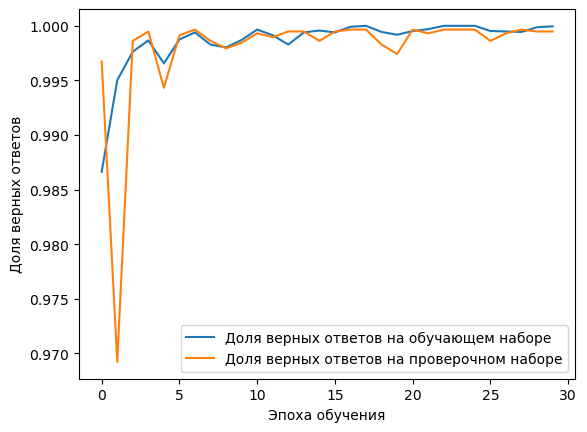

In [59]:
plt.plot(his.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(his.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()